In [1]:
! pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=8277c2ada3b3bd70a9dab6b8df48232754e5a5a4149f2a929a05c264740492ff
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import load_model
# from keras.layers import LeakyReLU
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [3]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images("../input/human-anime/human_anime"))
# print(imagePaths)
data = []
labels = []

[INFO] loading images...


In [4]:
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(72, 72))
	image = img_to_array(image)
# 	image = preprocess_input(image)
	# update the data and labels lists, respectively
	# count+=1/
	# if count%10==0:
	data.append(image)
	labels.append(label)
    


In [5]:
data = np.array(data, dtype="float32")
labels1 = np.array(labels)
del labels
print("labels",labels1.shape)
# perform one-hot encoding on the labels
lb = LabelEncoder()
labels = lb.fit_transform(labels1)
labels = to_categorical(labels)
print(labels,type(labels))

labels (37369,)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] <class 'numpy.ndarray'>


In [6]:
print(data.shape,labels.shape)
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.2, stratify=labels, random_state=42)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(37369, 72, 72, 3) (37369, 7)
(29895, 72, 72, 3) (7474, 72, 72, 3) (29895, 7) (7474, 7)


In [7]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [16]:
pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=7bac0ee41922b176dcb8608dfcbb0b12a408184fc999444917145233f6240296
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPool2D,BatchNormalization,ZeroPadding2D,ReLU
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

In [19]:
def identity_block(X, f, filters, stage, block):
    
    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [20]:
def convolutional_block(X, f, filters, stage, block, s=2):

    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [41]:
def ResNet50(input_shape = (72, 72, 3), classes = 7):   
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2,2), padding='same')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(512, activation="relu",kernel_regularizer=regularizers.l2(0.001))(X)
    X = Dense(512, activation="relu",kernel_regularizer=regularizers.l2(0.001))(X)
    X = Dropout(0.15)(X)
    X = Dense(156, activation="relu",kernel_regularizer=regularizers.l2(0.001))(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [42]:
INIT_LR = 1e-4
EPOCHS = 250
BS = 128


# baseModel = Sequential()
# # baseModel.add(Dense(12, activation='relu', input_tensor = Input(shape=(48,48,3))))
# baseModel.add(InputLayer(input_shape = (72,72,3)))
# # baseModel = tf.keras.applications.Xception(input_shape=(72,72,3),include_top=False,weights='imagenet')
# headModel = baseModel.output
# headModel = ZeroPadding2D()(headModel)
# headModel = Conv2D(48,3,activation="relu")(headModel)
# headModel = BatchNormalization()(headModel)
# headModel = ZeroPadding2D()(headModel)
# headModel = MaxPool2D(pool_size = (2,2))(headModel)
# headModel = Conv2D(48,3,activation="relu",padding = "same")(headModel)
# headModel = BatchNormalization()(headModel)
# headModel = Conv2D(96,3,activation="relu",padding = "same")(headModel)






# headModel = Dropout(0.15)(headModel)
# headModel = Conv2D(96,3,activation="relu",padding = "same")(headModel)
# headModel = MaxPool2D(pool_size = (2,2))(headModel)
# headModel = BatchNormalization()(headModel)
# headModel = Dropout(0.15)(headModel)

# headModel = Conv2D(192,3,activation="relu",padding = "same")(headModel)
# headModel = Conv2D(192,3,activation="relu",padding = "same")(headModel)
# headModel = Conv2D(192,3,activation="relu",padding = "same")(headModel)
# headModel = MaxPool2D(pool_size = (2,2))(headModel)
# headModel = BatchNormalization()(headModel)
# headModel = Dropout(0.15)(headModel)

# headModel = Conv2D(384,3,activation="relu",padding = "same")(headModel)
# headModel = Conv2D(384,3,activation="relu",padding = "same")(headModel)
# headModel = Conv2D(384,3,activation="relu",padding = "same")(headModel)
# headModel = MaxPool2D(pool_size = (4,4))(headModel)
# # headModel = BatchNormalization()(headModel)
# # headModel = Dropout(0.2)(headModel)


# # headModel = Conv2D(384,3,activation="relu",padding = "same")(headModel)
# # # headModel = BatchNormalization()(headModel)
# # headModel = Conv2D(384,3,activation="relu",padding = "same")(headModel)
# # # headModel = BatchNormalization()(headModel)
# # headModel = Conv2D(384,3,activation="relu",padding = "same")(headModel)
# # # headModel = BatchNormalization()(headModel)
# # headModel = MaxPool2D(pool_size = (2,2),padding = "valid")(headModel)
# # headModel = Dropout(0.2)(headModel)

# # construct the head of the model that will be placed on top of the
# # the base model
# # headModel = baseModel.output
# # headModel = AveragePooling2D(pool_size=(1, 1))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(512, activation="relu",kernel_regularizer=regularizers.l2(0.001))(headModel)
# headModel = Dropout(0.15)(headModel)
# headModel = Dense(512, activation="relu",kernel_regularizer=regularizers.l2(0.001))(headModel)
# headModel = Dense(512, activation="relu",kernel_regularizer=regularizers.l2(0.001))(headModel)
# headModel = Dropout(0.15)(headModel)
# headModel = Dense(156, activation="relu",kernel_regularizer=regularizers.l2(0.001))(headModel)
# # headModel = Dropout(0.1)(headModel)
# # headModel = Dense(256, activation="relu",kernel_initializer = 'he_normal')(headModel)
# # headModel = Dense(1024, activation="relu")(headModel)
# # headModel = Dense(256, activation="relu")(headModel)
# headModel = Dense(7, activation="softmax")(headModel)

# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
# model = Model(inputs=baseModel.input, outputs=headModel)


# checkpoint = ModelCheckpoint('EmotionDetectionModel.h5',
#                              monitor='val_loss',
#                              mode='min',
#                              save_best_only=True,
#                              verbose=0)

# # earlystop = EarlyStopping(monitor='val_loss',
# #                           min_delta=0,
# #                           patience=3,
# #                           verbose=1,
# #                           restore_best_weights=True
# #                           )

# # reduce_lr = ReduceLROnPlateau(monitor='val_loss',
# #                               factor=0.2,
# #                               patience=5,
# #                               verbose=1,
# #                               min_delta=0.0001)

# callbacks = [checkpoint]

# # for layer in baseModel.layers:
# # 	layer.trainable = False

# print(model.summary())

In [43]:
model = ResNet50(input_shape = (72, 72, 3), classes = 7)

In [44]:
checkpoint = ModelCheckpoint('EmotionDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=0)

callbacks = [checkpoint]
print(model.summary())

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 78, 78, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 36, 36, 64)   9472        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 36, 36, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [45]:
# for layer in baseModel.layers:
# 	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])



[INFO] compiling model...


In [46]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
    callbacks=callbacks,
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

model = load_model("EmotionDetectionModel.h5")


# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
print(predIdxs)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
print(predIdxs)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("/kaggle/working/model.h5", save_format="h5")



[INFO] training head...
Epoch 1/250
233/233 [==============================] - 56s 241ms/step - loss: 3.4547 - accuracy: 0.2326 - val_loss: 3.2458 - val_accuracy: 0.2482
Epoch 2/250
233/233 [==============================] - 53s 229ms/step - loss: 3.1072 - accuracy: 0.2426 - val_loss: 2.9723 - val_accuracy: 0.2473
Epoch 3/250
233/233 [==============================] - 53s 229ms/step - loss: 2.8722 - accuracy: 0.2510 - val_loss: 2.7906 - val_accuracy: 0.2424A: 20s - loss: 2.9165 - accu - ETA: 17s - lo - ETA - ETA: 1s - loss: 2.8759 
Epoch 4/250
233/233 [==============================] - 53s 228ms/step - loss: 2.6799 - accuracy: 0.2607 - val_loss: 2.6244 - val_accuracy: 0.2485
Epoch 5/250
233/233 [==============================] - 54s 230ms/step - loss: 2.5096 - accuracy: 0.2798 - val_loss: 2.5678 - val_accuracy: 0.2576
Epoch 6/250
233/233 [==============================] - 54s 231ms/step - loss: 2.3531 - accuracy: 0.3059 - val_loss: 2.2929 - val_accuracy: 0.3229
Epoch 7/250
233/233 [===

233/233 [==============================] - 53s 226ms/step - loss: 0.9399 - accuracy: 0.6543 - val_loss: 1.2458 - val_accuracy: 0.5510
Epoch 55/250
233/233 [==============================] - 52s 221ms/step - loss: 0.9337 - accuracy: 0.6571 - val_loss: 1.1021 - val_accuracy: 0.6007
Epoch 56/250
233/233 [==============================] - 52s 224ms/step - loss: 0.9316 - accuracy: 0.6597 - val_loss: 1.1496 - val_accuracy: 0.5769
Epoch 57/250
233/233 [==============================] - 53s 228ms/step - loss: 0.9227 - accuracy: 0.6665 - val_loss: 1.0661 - val_accuracy: 0.6173
Epoch 58/250
233/233 [==============================] - 52s 222ms/step - loss: 0.9158 - accuracy: 0.6621 - val_loss: 1.2165 - val_accuracy: 0.5617
Epoch 59/250
233/233 [==============================] - 52s 224ms/step - loss: 0.9040 - accuracy: 0.6662 - val_loss: 1.1201 - val_accuracy: 0.6041 0.8959 - accu - ETA: 1s - loss: 0.9032 - accu
Epoch 60/250
233/233 [==============================] - 52s 221ms/step - loss: 0.9058

Epoch 109/250
233/233 [==============================] - 54s 231ms/step - loss: 0.6316 - accuracy: 0.7719 - val_loss: 1.2213 - val_accuracy: 0.6038
Epoch 110/250
233/233 [==============================] - 53s 229ms/step - loss: 0.6241 - accuracy: 0.7737 - val_loss: 1.3065 - val_accuracy: 0.5876
Epoch 111/250
233/233 [==============================] - 54s 231ms/step - loss: 0.6145 - accuracy: 0.7793 - val_loss: 1.2494 - val_accuracy: 0.6096
Epoch 112/250
233/233 [==============================] - 54s 233ms/step - loss: 0.6164 - accuracy: 0.7777 - val_loss: 1.5120 - val_accuracy: 0.5492
Epoch 113/250
233/233 [==============================] - 54s 232ms/step - loss: 0.6114 - accuracy: 0.7776 - val_loss: 1.1804 - val_accuracy: 0.6468
Epoch 114/250
233/233 [==============================] - 55s 236ms/step - loss: 0.6019 - accuracy: 0.7825 - val_loss: 1.2313 - val_accuracy: 0.6173
Epoch 115/250
233/233 [==============================] - 54s 234ms/step - loss: 0.5977 - accuracy: 0.7829 - val_

233/233 [==============================] - 52s 224ms/step - loss: 0.3910 - accuracy: 0.8576 - val_loss: 1.4139 - val_accuracy: 0.6398
Epoch 165/250
233/233 [==============================] - 53s 227ms/step - loss: 0.3918 - accuracy: 0.8616 - val_loss: 1.3623 - val_accuracy: 0.6315
Epoch 166/250
233/233 [==============================] - 52s 222ms/step - loss: 0.3830 - accuracy: 0.8669 - val_loss: 1.3712 - val_accuracy: 0.6440
Epoch 167/250
233/233 [==============================] - 51s 221ms/step - loss: 0.3811 - accuracy: 0.8660 - val_loss: 1.5805 - val_accuracy: 0.6169
Epoch 168/250
233/233 [==============================] - 52s 225ms/step - loss: 0.3814 - accuracy: 0.8659 - val_loss: 1.7447 - val_accuracy: 0.5747
Epoch 169/250
233/233 [==============================] - 52s 223ms/step - loss: 0.3705 - accuracy: 0.8708 - val_loss: 1.4585 - val_accuracy: 0.6234 0.3659 - acc - ETA: 13s - loss: 
Epoch 170/250
233/233 [==============================] - 52s 221ms/step - loss: 0.3714 - accu

233/233 [==============================] - 52s 225ms/step - loss: 0.2487 - accuracy: 0.9132 - val_loss: 1.7768 - val_accuracy: 0.6408
Epoch 220/250
233/233 [==============================] - 53s 226ms/step - loss: 0.2441 - accuracy: 0.9141 - val_loss: 1.5711 - val_accuracy: 0.6547
Epoch 221/250
233/233 [==============================] - 52s 222ms/step - loss: 0.2427 - accuracy: 0.9149 - val_loss: 1.5924 - val_accuracy: 0.6547
Epoch 222/250
233/233 [==============================] - 53s 227ms/step - loss: 0.2397 - accuracy: 0.9158 - val_loss: 1.5661 - val_accuracy: 0.6448
Epoch 223/250
233/233 [==============================] - 52s 222ms/step - loss: 0.2351 - accuracy: 0.9186 - val_loss: 1.8242 - val_accuracy: 0.6037
Epoch 224/250
233/233 [==============================] - 52s 222ms/step - loss: 0.2369 - accuracy: 0.9185 - val_loss: 1.5705 - val_accuracy: 0.6614
Epoch 225/250
233/233 [==============================] - 52s 224ms/step - loss: 0.2321 - accuracy: 0.9211 - val_loss: 1.6530 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


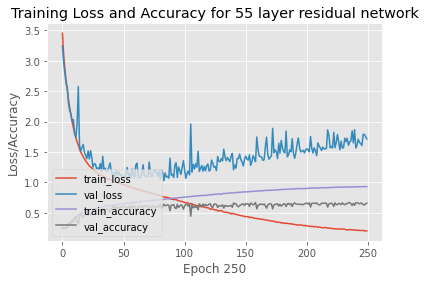

In [47]:
history_dict = H.history
print(history_dict.keys())

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training and validation Accuracy for 55 layer residual network")
plt.xlabel(f"Epoch {EPOCHS}")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("/kaggle/working/plot")